In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
%matplotlib inline
#import gzip
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
(x_train,x_test)=(x_train/255.0,x_test/255.0)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

In [7]:
x_train[400]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
y_train[400]


2

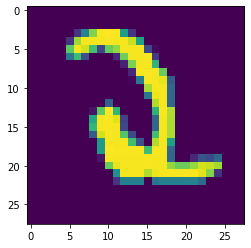

In [9]:

image = np.asarray(x_train[400])
plt.imshow(image)
plt.show()


Text(0.5, 0.98, 'Label, image')

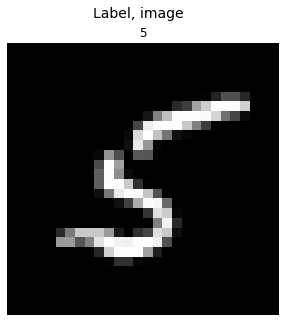

In [10]:
fig, axes = plt.subplots( figsize=(5,5))
random_index = np.random.randint(60000)
axes.imshow(x_train[random_index], cmap='gray')
axes.set_title(y_train[random_index])
axes.set_axis_off()
fig.suptitle("Label, image", fontsize=14)

In [11]:
y_train[50]

3

In [12]:
X_train=x_train.reshape(60000,-1)
X_train[50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
print (x_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:

from keras import regularizers
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(784,)),
        Dense(units=100,activation="relu",name="L1"),Dense(units=40,activation="relu",name="L2"),Dense(units=10,activation="linear",name="L3")
        ### END CODE HERE ### 
    ], name = "my_model" 
)

tf.keras.regularizers.L2(0.01)  # L2 Regularization Penalty

In [15]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 100)               78500     
                                                                 
 L2 (Dense)                  (None, 40)                4040      
                                                                 
 L3 (Dense)                  (None, 10)                410       
                                                                 
Total params: 82,950
Trainable params: 82,950
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2636 - accuracy: 0.9233
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1114 - accuracy: 0.9667
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0805 - accuracy: 0.9753
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0639 - accuracy: 0.9798
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0499 - accuracy: 0.9838
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0409 - accuracy: 0.9865
Epoch 7/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0344 - accuracy: 0.9886
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0286 - accuracy: 0.9907
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0267 - accuracy: 0.9912
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.02

In [17]:
X_train.shape

(60000, 784)

In [18]:
f = model.predict(X_train)
yhat = np.argmax(f, axis=1)
doo = yhat != y_train
idxs = np.where(yhat != y_train[:])[0]
idxs


1875/1875 [==============================] - 6s 3ms/step


array([  547,   657,  1047,  1357,  1804,  2098,  2720,  2841,  3118,
        3297,  3696,  3810,  4253,  4638,  4761,  4762,  5084,  5616,
        5638,  5661,  6498,  6848,  6861,  8012,  8045,  8729,  8765,
       10042, 10319, 10850, 11570, 11827, 11843, 11885, 11984, 12297,
       12435, 12594, 12936, 14626, 15183, 15999, 16023, 16275, 17937,
       19112, 20773, 21218, 21606, 21723, 22204, 22507, 22617, 22746,
       23008, 23886, 24112, 24284, 24845, 25262, 25562, 25799, 26293,
       26504, 26760, 27293, 27358, 27545, 27838, 28162, 28444, 28928,
       29381, 29476, 30986, 31637, 31706, 31856, 32342, 33059, 33150,
       33519, 34048, 34080, 34556, 34707, 34785, 34802, 35246, 35441,
       35554, 35851, 36232, 36760, 36766, 36774, 36820, 37122, 37281,
       37834, 37838, 38403, 38510, 38544, 38586, 38638, 39104, 39327,
       39342, 39383, 39423, 39668, 40547, 40964, 41322, 41431, 41742,
       42624, 43042, 43109, 43454, 43562, 43670, 43793, 44456, 44961,
       45043, 45117,

In [19]:
yhat[48]

9

Text(0.5, 0.98, 'Label, image')

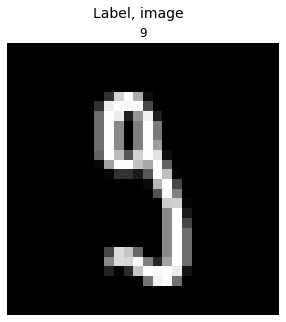

In [20]:
fig, axes = plt.subplots( figsize=(5,5))
random_index = 48
axes.imshow(x_train[random_index], cmap='gray')
axes.set_title(y_train[random_index])
axes.set_axis_off()
fig.suptitle("Label, image", fontsize=14)

In [29]:
def errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:]
    idxs = np.where(yhat != y[:])[0]
    if len(idxs) == 0:
        print("no errors found")
    return(len(idxs))

In [30]:
X_test=x_test.reshape(-1,784)
X_test.shape

(10000, 784)

In [31]:
a=errors(model,X_test,y_test)
print(a,  f"errors out of {len(X_test)} images")

313/313 [==============================] - 1s 3ms/step
223 errors out of 10000 images


In [28]:
print (100- (a*100.0/len(X_test)))

97.77
